# Waffle Charts

By **Franklin Oliveira**

-----
This notebook contains all code written to make the Waffle Charts of collections info in file: <font color='blue'>'Dados gerais de coleção MN_29_09_19 enviado KELLNER_Asla.xlsx'</font>.

## Basic imports

In [29]:
import datetime
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt



from collections import defaultdict

# this package does most of the heavy work of constructing the Waffle Charts
# docs: https://pywaffle.readthedocs.io/en/latest/examples/block_shape_distance_location_and_direction.html
from pywaffle import Waffle 

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Waffle Chart

In [4]:
# importing data
ex = pd.ExcelFile('Dados gerais de coleção MN_29_09_19 enviado KELLNER_Asla.xlsx')
print(ex.sheet_names)

['Dados Gerais', 'Dados por coleção']


In [5]:
dados_gerais = ex.parse('Dados Gerais', sep=';', encoding='utf-8-sig')
dados_colecao = ex.parse('Dados por coleção', sep=';', encoding='utf-8-sig')

In [6]:
dados_colecao.head(2)

,Unnamed: 0,Coleção,Curador,número de exemplares tombados e backlog,sub-coleções,Material afetado no incêndio (N),Material afetado no incêndio (% do total),Unnamed: 7,Unnamed: 8
0,DA,Arqueológica do Museu Nacional,"Rita Scheel-Ybert, Antonio Brancaglion Jr, Ang...",510674,Reserva Técnica Principal da Arquelogia (Palác...,153202,0.765019,29.999961,NaN
1,DA,Arqueobotânica do Museu Nacional,Rita Scheel-Ybert,528187,Coleções Arqueobotânicas Arqueológicas (Antrac...,528187,2.637520,100.000000,NaN


In [7]:
# slicing
dc = dados_colecao[['Unnamed: 0', 'Coleção', 'número de exemplares tombados e backlog', 
               'Material afetado no incêndio (N)',
               'Material afetado no incêndio (% do total)', 'Unnamed: 7']].copy()

In [8]:
# renaming columns
dc.rename(columns={'Unnamed: 0':'dept', 'Coleção':'colecao', 
                   'número de exemplares tombados e backlog':'numero_exemp',
                   'Material afetado no incêndio (N)':'incendio', 
                    'Material afetado no incêndio (% do total)':'incendio_perc_total',
                    'Unnamed: 7':'incendio_perc_colecao'}, inplace=True)

In [9]:
dc['dept'] = dc['dept'].str.upper().str.strip()
dc['dept'] = dc['dept'].str.replace('DIREÇÃO', 'Direção')

In [10]:
dc['colecao'] = dc['colecao'].apply(lambda x:str(x).split('(')[0].strip())

In [11]:
# shorting column names (to fit in the figure)
dc['colecao'] = dc['colecao'].str.replace('Centro de Documentação', 'Doc.')
dc['colecao'] = dc['colecao'].str.replace('do Museu Nacional', '').str.strip()
dc['colecao'] = dc['colecao'].str.replace('Biblioteca', 'Bib.')
dc['colecao'] = dc['colecao'].str.replace('Coleção de','')
dc['colecao'] = dc['colecao'].str.replace('COFRE DIREÇÃO', 'Cofre')
dc['colecao'] = dc['colecao'].str.replace('Coleção Didática de', '')
dc['colecao'] = dc['colecao'].str.replace('Setor de', '')

# removing blank spaces
dc['colecao'] = dc['colecao'].str.strip()

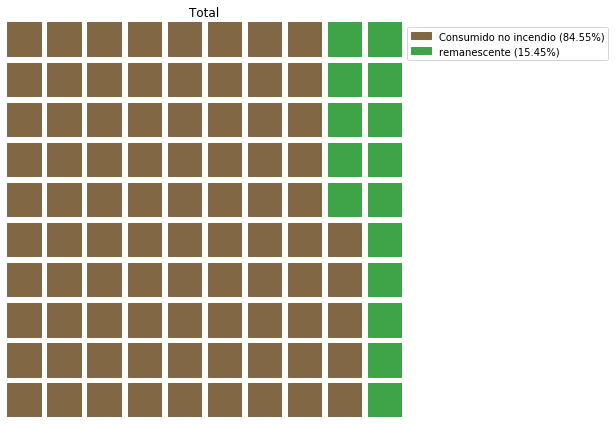

In [12]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=10, 
    values=[84.556, 100-84.556],
    colors=("#826745", "#3EA447"),
    title={'label': 'Total', 'loc': 'center'},
    labels=["{0} ({1}%)".format(k, v) for k, v in (('Consumido no incendio','84.55'),('remanescente' ,'{}'.format(round(100-84.55,2))))],
#     labels=["{0}".format(k) for k in ['consumido no incendio', 'remanescente']],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    icon_legend=True,
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)
plt.show()

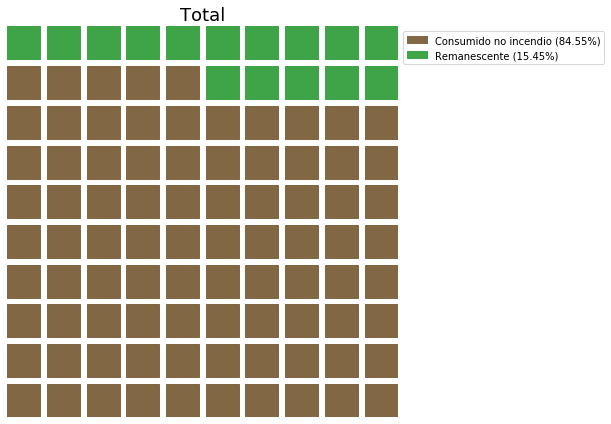

In [31]:
# Standart Figure
fig2 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=10, 
    values=[84.556, 100-84.556],
    colors=("#826745", "#3EA447"),
    title={'label': 'Total', 'loc': 'center', 'fontsize':18},
    labels=["{0} ({1}%)".format(k, v) for k, v in (('Consumido no incendio','84.55'),('Remanescente' ,'{}'.format(round(100-84.55,2))))],
#     labels=["{0}".format(k) for k in ['consumido no incendio', 'remanescente']],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    icon_legend=True,
    vertical=True,
#     icons=['fire','square'],  # fire, campfire, heart, heart-o - OBS: pode passar a ideia errada,
#     characters='⬤',
#     font_size=30,
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)
# plt.show()

plt.savefig('./waffles/total.svg')
plt.savefig('./waffles/total.png')

### Creating dicts for plots

each line is a department and each column a collection in the Matrix of charts.

In [14]:
# dc.head()

In [15]:
# departments sorted by the number of collections (more collections stays at the bottom)
deptos = dc['dept'].value_counts().sort_values(ascending=True).index

### Correcting some collections names (specialist input)

The correction of these names was strongly advised by Cris.

In [16]:
# dicionário com os nomes corretos 
nomes_colecao = {'Lepdóptera':'Lepdoptera', 'Poríferos':'Porífera'}

# If the name is correct, just return it.
def corrige_nome_colecao(colecao):
    try:
        return nomes_colecao[colecao]
    except:
        return colecao

# redefinindo a coluna
dc['colecao'] = dc['colecao'].apply(lambda x:corrige_nome_colecao(x))

### Defining recoverable colections and making the `Waffle Charts`

In [17]:
# dc['colecao'].unique()

In [18]:
# list of recoverable collections:
colecoes_recuperaveis = ('Antropologia Biológica', 'Etnográficas', 'Arqueológica', 'Malacologia', 
                         'Paleovertebrados', 'Paleoinvertebrados', 'Mineralogia', 'Petrografia', 'Meteoritos')

#### creating dict ("json") to be parsed into "multichart" module of Pywaffle

In [19]:
# creates a column of recoverable collections
def recuperavel(colecao):
    if colecao in colecoes_recuperaveis:
        return True
    else:
        return False

In [20]:
dc['recup'] = dc['colecao'].apply(recuperavel)

In [21]:
# sorting according to % of recovered elements
dc.sort_values(['dept','incendio_perc_colecao','recup'], ascending=True, inplace=True)

In [22]:
d = defaultdict()

index=0
adj = 0  # adjustment of lines (number of columns to jump when the last collection is finished by department)
for dept in deptos:
    temp = dc[dc['dept']==dept].sort_values('incendio_perc_colecao', ascending=False)
    
    row_count = temp.shape[0] # increases row with number of dept
#     print(temp,'\n\n')
    adj = 10
    for c in range(temp['colecao'].shape[0]):
        
        adj -= 1
        index += 1
        val = round(temp.iloc[c].loc['incendio_perc_colecao'], 2)
        colecao = temp.iloc[c].loc['colecao']
        numero_exemp = temp.iloc[c].loc['numero_exemp'].astype(int)
        
        # defining colors:
        cor_verde = '#3EA447'
        cor_marrom = '#826745'
        if colecao in colecoes_recuperaveis:
            cor_marrom = '#B6966E'
        
        # dict for chart
        d[(7,10,index)]= { 
                    'values':[val, 100-val],
                    'colors':(cor_marrom, cor_verde),
                    # p.s.: thousands separator is: ,
                    'title':{'label': f'{dept}\n{colecao}\n{numero_exemp:,} exemplares'.replace(',','.')
                             , 'loc': 'left', 'fontsize':14},
#                   'labels':["{0} ({1}%)".format(k, v) for k, v in data.items()],
#                   'labels':["{0}".format(k) for k in ['% da colecao consumida no incendio', '% remanescente da coleção']],
#                   'legend':{'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
#                   'icon_size':18, 
                    'icon_legend':True,
        }
    
        
        # jumps to the next line
        if c == temp['colecao'].shape[0]-1:
            index = index + adj
        
d = dict(d)
# d

#### Making `waffle charts`

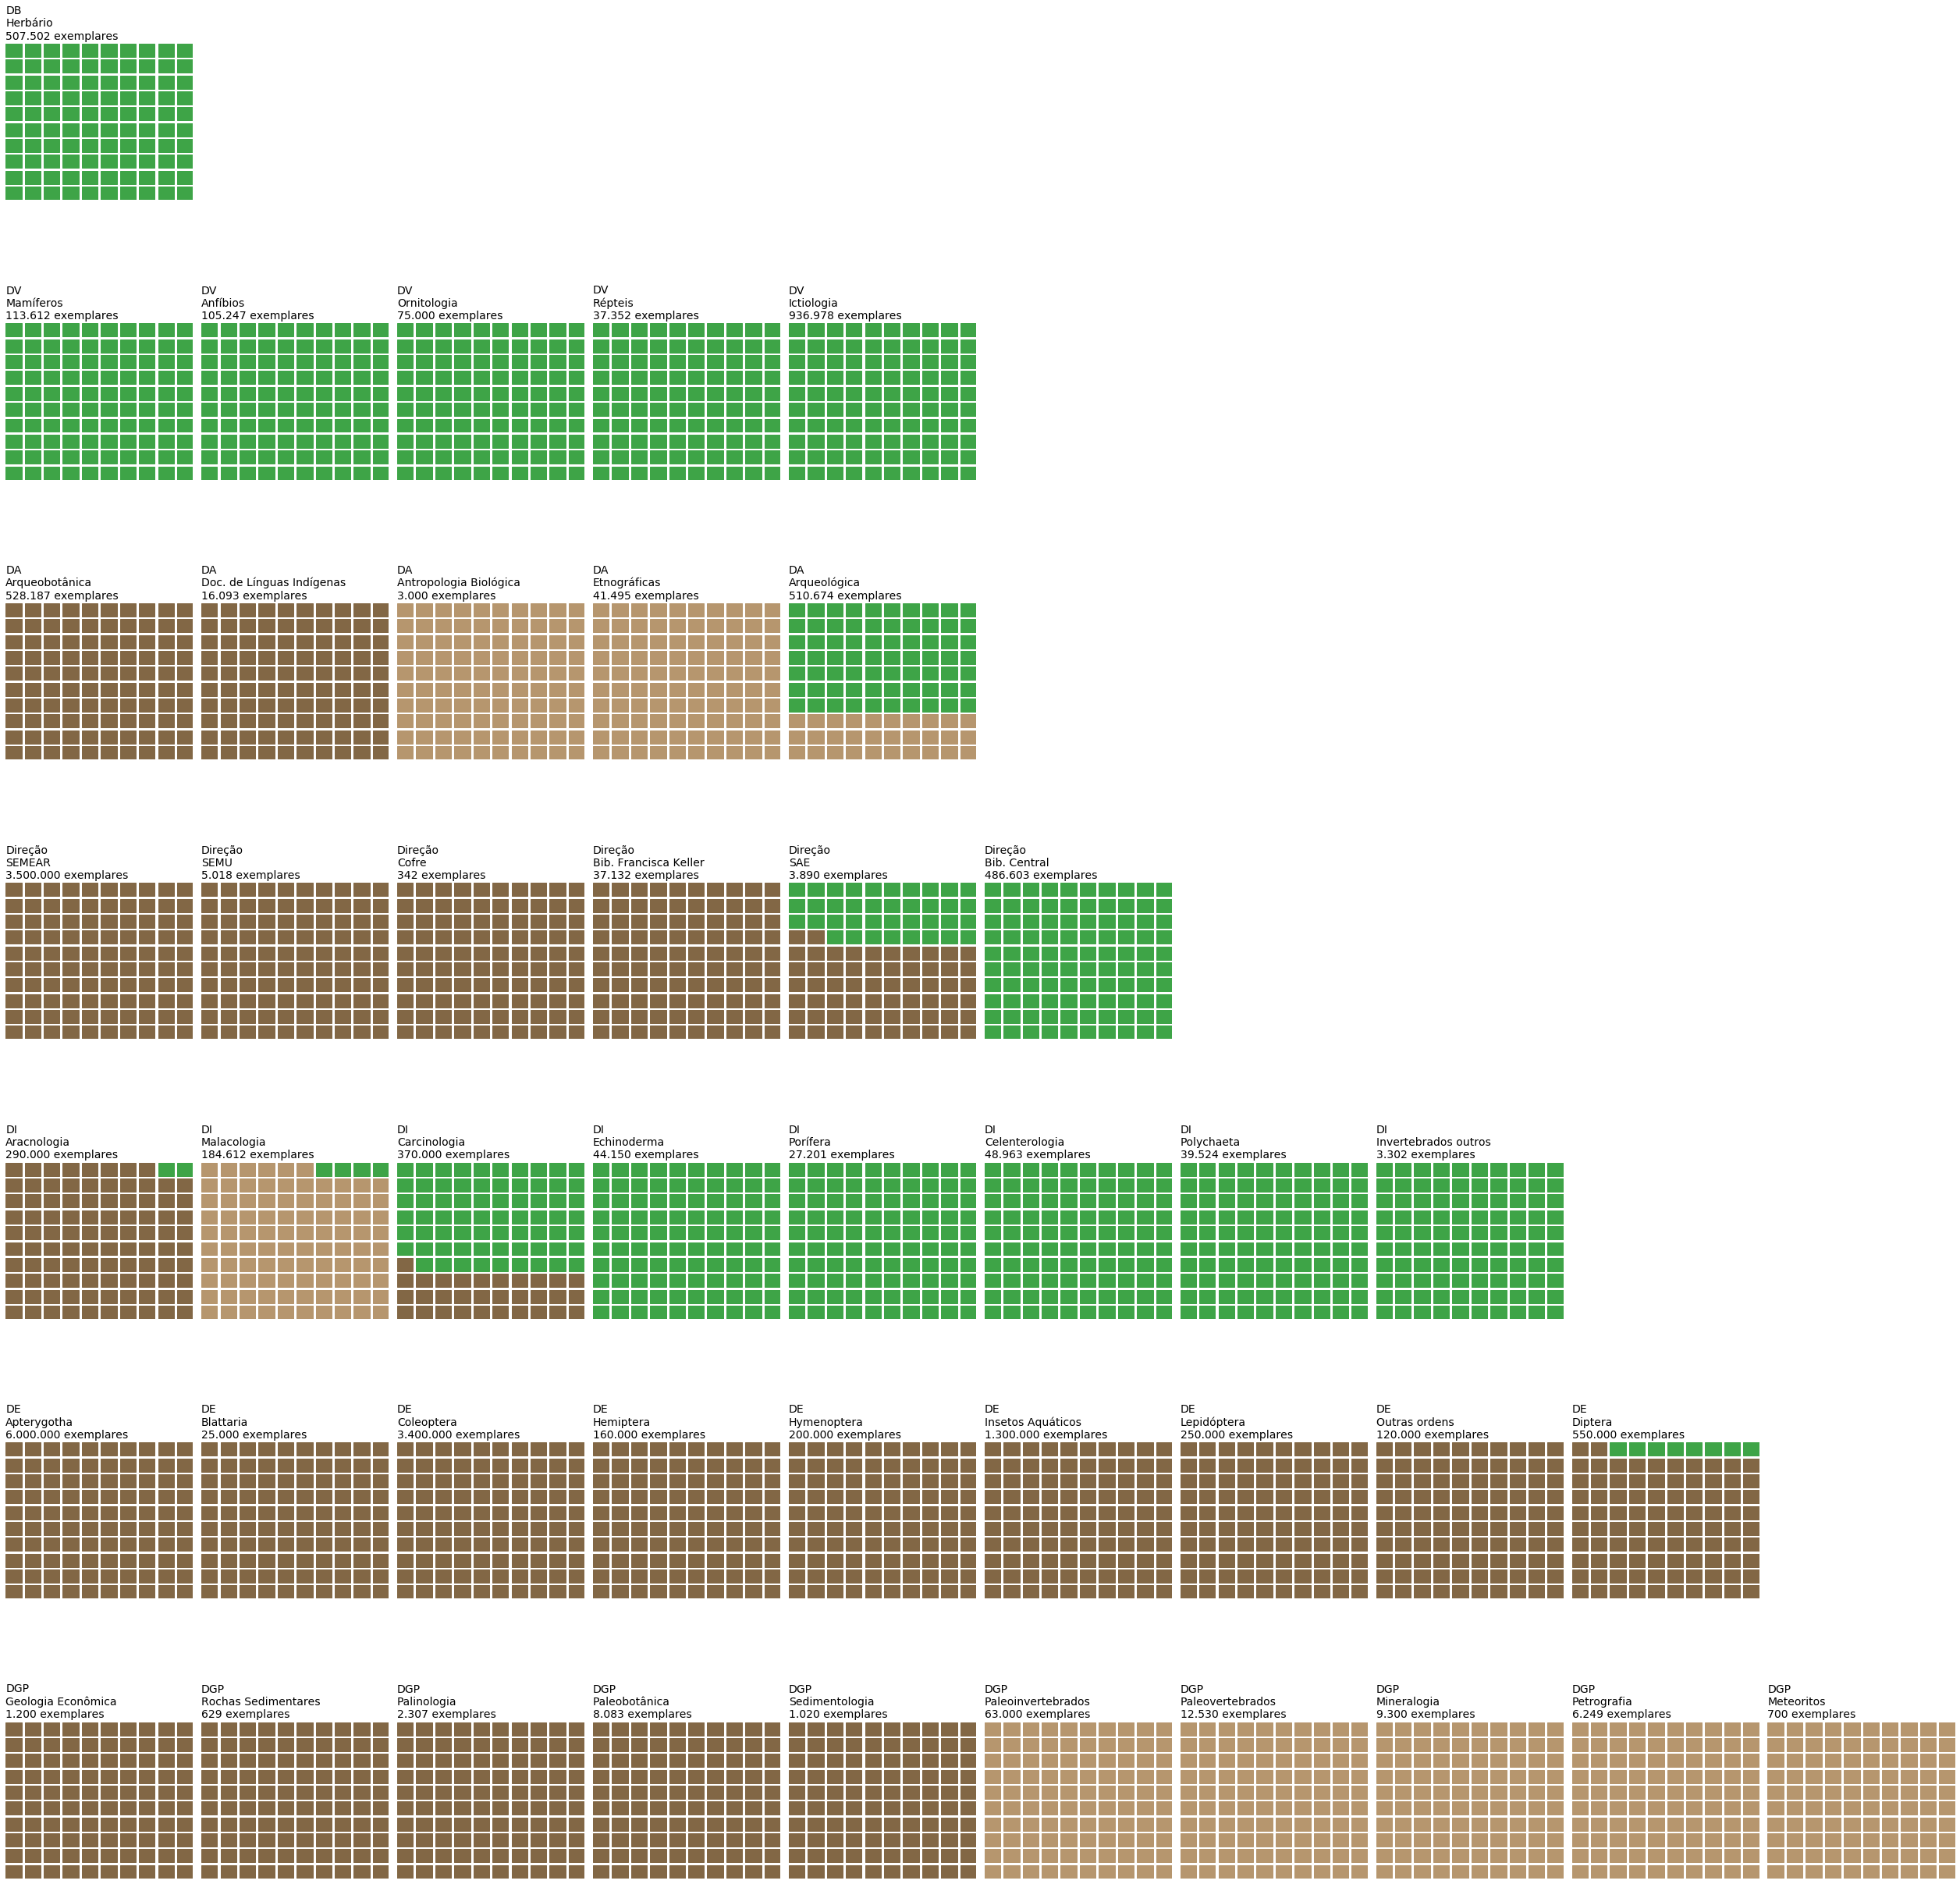

In [32]:
teste = plt.figure(
    FigureClass= Waffle,
    plots= d,
    rows=10, 
    columns=10, 
    vertical=True, 
    block_aspect_ratio=1.2,
    figsize=(35, 35)  # figsize is a parameter of matplotlib.pyplot.figure
)

plt.savefig('./waffles/waffle_colecao.svg')
plt.savefig('./waffles/waffle_colecao.png')

-----

### Bar Chart

This graph, as asked by Cris, is intended to show the absolute amounts of items lost and recovered on the fire.

In [24]:
temp = dc.copy()
temp['dept'].fillna('Total', inplace=True)

del temp['recup']

In [25]:
temp['Remanescentes'] = temp['numero_exemp'].astype(int) - temp['incendio'].astype(int)

In [26]:
temp = temp.rename(columns={'numero_exemp':'Total', 'incendio':'Consumidos'})

In [27]:
temp = temp.set_index(['colecao','incendio_perc_total','incendio_perc_colecao'])
temp = temp.groupby(['dept']).sum().stack().reset_index()
temp.columns = ['dept','nivel','num']

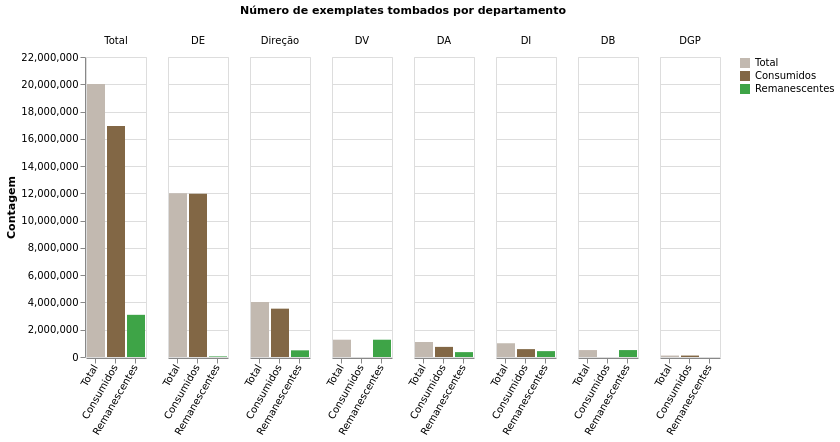

In [34]:
bar1 = alt.Chart(temp).mark_bar().encode(
    x = alt.X('nivel', sort= alt.EncodingSortField(field="nivel", op="mean", order='ascending'),
             title='', axis=alt.Axis(labelAngle=-60)),
    y= alt.Y('num', title='Contagem'), 
    color= alt.Color('nivel', scale= 
            alt.Scale(domain=['Total','Consumidos','Remanescentes'], 
                      range=['#c2b9b0','#826745','#3EA447'])
        , title=''),
    column=alt.Column('dept', sort= ['Total','DE','Direção','DV','DA','DI','DB','DGP'],
                     title='Número de exemplates tombados por departamento')
)

bar1.save('./waffles/exemp_por_dept.svg')
bar1.save('./waffles/exemp_por_dept.html')
bar1.save('./waffles/exemp_por_dept.png')

bar1

<br>

**The end!**

-----